# CHAPTER 5 순환 신경망(RNN)

지금까지 살펴본 신경망은 피드포워드(feed forward)라는 유형의 신경망  
피드포워드란 흐름이 단방향인 신경망을 말함  
  
피드포워드 신경망은 구성이 단순하여 구조를 이해하기 쉽고, 그래서 많은 문제에 응용할 수 있음  
하지만 시계열 데이터의 성질(패턴)을 충분히 학습할 수 없다는 단점이 있음  
그래서 __순환 신경망(Recurrent Neaural Network, RNN)__이 등장함

## 5.1 확률과 언어 모델

### 5.1.1 word2vec을 확률 관점에서 바라보다

<img src='./img/5/cbow_1.png' width=400>  
  
CBOW 모델의 경우,  
$w_1, w_2, \cdots, w_T$라는 단어열로 표현되는 말뭉치가 있고,  
t번째 단어를 '타깃'으로,  
그 전후 단어(t-1번째와 t+1번째)를 '맥락'으로 봤을 때  
CBOW 모델은 위 그림처럼 맥락 $w_{t-1}$과 $w_{t+1}$로부터 타깃 $w_t$를 추측하는 일을 수행함  
  
$w_{t-1}$과 $w_{t+1}$가 주어졌을 때 타깃이 $w_t$가 될 확률은 다음과 같다.  
  
$P(w_t|w_{t-1}, w_{t+1})$  
  
위 예시는 맥락을 좌우 대칭으로 다뤘음  
맥락을 왼쪽 윈도우로만 한정하게 되면 다음과 같다.  
  
<img src='./img/5/cbow_2.png' width=400>  
  
$P(w_t|w_{t-2}, w_{t-1})$  
  
여기에 교차엔트로피 오차 손실함수를 적용하면 다음과 같다.  
  
$L=-logP(w_t|w_{t-2}, w_{t-1})$  
  
CBOW 모델의 학습이 수행하는 일은 손실 함수를 최소화하는 가중치 매개변수를 찾는 것임  
CBOW 모델을 학습시키는 본래 목적은 맥락으로부터 타깃을 정확하게 추측하는 것이고,  
이 목적을 위해 학습을 진행하면, 단어의 의미가 인코딩된 '단어의 분산 표현'을 얻을 수 있음  
  
여기서, CBOW 모델의 본래 목적인 '맥락으로부터 타깃을 추측하는 것'  
즉, 확률 $P(w_t|w_{t-2}, w_{t-1})$는 '언어 모델'에서 이용

### 5.1.2 언어 모델

언어 모델(Language Model)을 단어 나열에 확률을 부여함  
특정한 단어의 시퀀스에 대해서, 그 시퀀스가 일어날 가능성이 어느 정도인지를 확률로 평가  
  
언어 모델은 기계번역, 음성인식 등과 새로운 문장을 생성하는 용도로도 이용할 수 있음  
확률분포에 따라 다음으로 적합한 단어를 샘플링할 수 있기 때문  
  
<img src='./img/5/cbow_3.png' width=500>  
  
$w_1, \cdots, w_m$이라는 m개 단어로 된 문장이 있을 때, 단어가 $w_1, \cdots, w_m$순서로 출현할 확률은 $P(w_1, \cdots, w_m)$으로 나타냄  
이 확률은 여러 사건이 동시에 일어날 확률이므로 동시 확률이라고 함  
  
이 동시 확률은 사후 확률의 총 곱으로 나타낼 수 있음  
  
$P(w_1, \cdots, w_m)=P(w_m|w_1, \cdots, w_{m-1})P(w_{m-1}|w_1, \cdots, w_{m-2})\cdots P(w_3|w_2, w_1)P(w_2|w_1)P(w_1)\\
=\Pi_{t=1}^mP(w_t|w_1,\cdots,w_{t-1})$  
  
이 사후 확률은 타깃 단어보다 왼쪽에 있는 단어를 맥락(조건)으로 했을 때의 확률임  
  
$P(w_t|w_1,\cdots, w_{t-1})$을 나타내는 모델을 조건부 언어 모델(conditional Language Model) 또는 '언어 모델'이라고 함

### 5.1.3 CBOW 모델을 언어 모델로?

word2vec의 CBOW 모델은 맥락의 크기를 특정 값으로 한정하여 언어모델에 근사하게 나타낼 수 있음  
예를 들어 맥락을 왼쪽 2개의 언어로 한정한다면 다음과 같이 쓸 수 있음  
  
$P(w_1,\cdots, w_m)=\Pi_{t=1}^mP(w_t|w_1,\cdots,w_{t-1})\approx\Pi_{t=1}^mP(w_t|w_{t-2},w_{t-1})$  
  
\* 마르코프 연쇄(Markov Chain) 또는 마르코프 모델(Markov Model)이란 미래의 상태가 현재 상태에만 의존해 결정되는 것을 말하는 것으로, 이 사상의 확률을 '그 직전' N개의 사건에만 의존할 때, 'N층 마르코프 연쇄'라고 함  
위 예시는 직전 2개의 단어에만 의존해 다음 단어가 정해지는 모델이므로 '2층 마르코프 연쇄'라고 할 수 있음  
  
맥락의 크기를 정함으로써 특정 길이로 '고정'할 수 있음  
이렇게 되면 맥락보다 더 왼쪽에 있는 단어의 정보는 무시됨  
  
예를 들어,  
Tom was watching TV in his room. Mary came into the room. Mary said hi to (?)  
라는 문제가 있을 때, 문맥(맥락)을 고려하면 '?'는 Tom이 됨.  
하지만 맥락을 10으로 한정하게 되면 더 왼쪽에 있는 단어는 무시되기 때문에 정답인 Tom을 기억할 수 없음  
  
만약 맥락 크기를 더 크게 키운다 하더라도  
CBOW(continuous bag-of-wards) 모델은 맥락 안의 단어 순서가 무시되는 bag-of-words 모델이기 때문에 이 문제를 푸는데 적합하지 않음  
\* bag-of-words : '가방 안의 단어', 단어 '순서'는 무시하고 대신 '분포'를 사용함
  
<img src='./img/5/cbow_4.png' width=500>  
  
왼쪽 그림과 같이 CBOW 모델은 은닉층에서는 단어 벡터들이 더해지므로 맥락의 단어 순서가 무시됨  
  
오른쪽 그림처럼 맥락의 단어 벡터를 은닉층에서 연결하는 방식을 사용할 수 있지만,  
이 방식을 취하면 맥락의 크기에 비례해 가중치 매개변수도 늘어나는 문제가 있음  
(신경 확률론적 언어모델(Neural Probabilistic Language Model)에서 제안한 모델은 이 방식을 취함)  
  
하지만, RNN은 맥락이 아무리 길더라도 그 맥락의 정보를 기억하는 메커니즘을 갖추고 있음  
  
< 참고 >  
  
word2vec은 단어의 분산 표현을 얻을 목적으로 고안된 기법  
따라서 보통 이를 언어 모델로 사용하지는 않음  
지금은 단지 예시로 보여주기 위해 CBOW 모델을 억지로 언어 모델에 적용한 것!  

## 5.2 RNN이란

RNN(Recurrent Neural Network, 순환 신경망)의 'Recurrent'는 '몇 번이나 반복해서 일어나는 일'을 뜻함  

### 5.2.1 순환하는 신경망

'순환한다'란 어느 한 지점에서 시작한 것이, 시간을 지나 다시 원래 장소로 돌아오는 것, 그리고 이 과정을 반복하는 것, 즉 '반복해서 되돌아감'을 의미함  
  
<img src='./img/5/RNN_1.png' width=400>  
  
RNN은 위 그림처럼 순환하는 경로(닫힌 경로)가 있음(출력이 분기되어 분기된 출력 중 하나는 자기 자신에 입력됨)  
순환 경로가 있기에 데이터가 순환되어 과거의 정보를 기억하는 동시에 최신 데이터로 갱신할 수 있음  
  
RNN은 $x_t$를 입력받는데, 여기서 t는 시각을 뜻함  
시계열 데이터$x_0, x_1, \cdots, x_t, \cdots$)가 RNN 계층에 입력됨  
이 입력에 대응하여 $(h_0, h_1, \cdots, h_t, \cdots)$가 출력됨  
  
문장(단어 순서)를 다루는 경우라면 $x_t$는 각 단어의 분산 표현(단어 벡터)이며, 이 분산 표현이 순서대로 하나씩 RNN 계층에 입력됨  
  
(오른쪽 그림 : 순환구조를 펼처보기 위해 왼쪽의 계층 그림을 아래에서 위로 흐르도록 수정함)

### 5.2.2 순환 구조 펼치기

<img src='./img/5/RNN_2.png' width=500>  
  
순환구조를 펼치면 위 그림과 같음  
  
\* 시계열 데이터는 시간 방향으로 데이터가 나열되므로 인덱스를 가리킬 때는 '시각'이라는 용어를 사용함  
ex) '시각 t의 단어', '시각 t의 RNN 계층'처럼 표현하기도 함  
  
각 시각의 RNN 계층은 그 계층으로의 입력과 1개 전의 RNN 계층으로부터의 출려긍ㄹ 받음  
이 두 정보를 이용하여 현 시각의 출력을 계산함  
수식은 다음과 같다.  
  
$h_t=tanh(h_{t-1}W_h+x_tW_x+b)$  
  
여기서, b는 편향이고, $h_{t-1}$과 $x_t$는 행벡터임  
그리고, RNN에는 가중치가 2개 있음  
- $W_x$ : 입력 x를 출력 h로 변환하기 위한 가중치
- $W_h$ : RNN 출력을 다음 시각의 출력으로 변환하기 위한 가중치  
  
행렬 곱을 계산하고, 그 합을 tanh 함수를 이용해 변환하여 시각 t의 출력 $h_t$를 계산함  
이 $h_t$는 다른 계층을 향해 위쪽으로 출력되는 동시에, 다음 시각의 RNN 계층(자기 자신)을 향해 오른쪽으로도 출력됨  
  
현재의 출력($h_t)$는 한 시각 이전의 출력($h_{t-1})$에 기초해 계산되므로, RNN 계층을 '상태를 가지는 계층' 혹은 '메모리(기억력)가 있는 계층'이라고 함  
  
또한 RNN의 출력 $h_t$를 은닉 상태(hidden state) 혹은 은닉 상태 벡터(hidden state vector)라고 함  

### 5.2.3 BPTT

<img src='./img/5/RNN_3.png' width=500>  
  
위 그림과 같이 순환 구조를 펼친 후의 RNN에는 (일반적인) 오차역전파법을 적용할 수 있음  
여기서의 오차역전파법은 '시간 방향으로 펼친 신경망의 오차역전파법'이란 뜻으로 __BPTT(Backpropagation Through Time)__이라고 함  
  
하지만 시계열 데이터의 시간 크기가 커지는 것에 비례하여 BPTT가 소비하는 컴퓨팅 자원도 증가하고, 시간 크기가 커지면 역전파 시의 기울기가 불안정해지는 문제가 있음  

### 5.2.4 Truncated BPTT

<img src='./img/5/Truncated_BPTT_1.png' width=700>  
  
계층이 길어지면 계산량과 메모리 사용량 뿐만 아니라, 신경망을 하나 통과할 때마다 기울기 값이 조금씩 작아져서 이전 시각 t까지 역전파되기 전에 0이 되어 소멸할 수 있는 문제가 있음  
  
따라서 큰 시계열 데이터를 취급할 때는 흔히 신경망 연결을 적당한 길이로 끊음  
잘라낼 때는 '역전파'의 연결만 끊음 (순전파의 연결은 그대로 유지)  
  
역전파가 연결되는 일련의 RNN 계층을 '블록'이라고 함  
잘라낸 작은 신경망인 각각의 블록 단위로 미래 블록과는 독립적으로 오차역전파법을 수행하며 이러한 기법을 __Truncated BPTT 기법__이라고 함  
  
지금까지 본 신경망에서 미니배치 학습을 수행할 때는 데이터를 무작위로 선택해 입력했으나,  
RNN에서 Truncated BPTT를 수행할 때는 데이터를 '순서대로' 입력해야 함  
  
ex)  
  
<img src='./img/5/Truncated_BPTT_2.png' width=400>  
  
위 그림과 같이 먼저 순전파를 수행하고, 그다음 역전파를 수행함  
  
<img src='./img/5/Truncated_BPTT_3.png' width=450>  
  
첫 번째 블록과 마찬가지로 순전파 수행 후 역전파를 수행  
여기서부터는 앞 블록의 마지막 은닉 상태($h_9$)가 필요  
이를 통해 순전파를 계속 연결함  
  
위 예시처럼 RNN 학습에서는 데이터를 순서대로 입력하며, 은닉 상태를 계승하면서 학습을 수행함  
또한 순전파의 연결을 유지하면서 블록 단위로 오차역전파법을 적용

### 5.2.5 Truncated BPTT의 미니배치 학습

<img src='./img/5/Truncated_BPTT_4.png' width=700>  
  
데이터를 순서대로 입력해야 하므로,  
각 미니배치의 시작 위치는 데이터를 주는 시작 위치로 옮겨줘야 함  
  
또한 데이터를 순서대로 입력하다가 끝에 도달하면 다시 처음부터 입력하도록 해야함

## 5.3 RNN 구현

<img src='./img/5/RNN_4.png' width=500>  
  
여기서 다룰 신경망은 길이가 T인 시계열 데이터를 받음  
그리고 각 시각의 은닉 상태 T개를 출력함  
  
<img src='./img/5/RNN_5.png' width=500>  
  
입력과 출력을 각각 하나로 묶으면 옆으로 늘어선 일련의 계층을 하나의 계층으로 간주할 수 있음  
즉, $(x_0, x_1, \cdots, x_{T-1})$을 묶은 xs를 입력하면 $(h_0, h_1, \cdots, h_{T-1})$을 묶은 hs를 출력하는 단일 계층으로 볼 수 있음  
  
(여기서부터는 한 단계의 작업을 수행하는 계층을 'RNN 계층',  
T개 단계분의 작업을 한꺼번에 처리하는 계층을 'Time RNN 계층'으로 표현하겠음)

### 5.3.1 RNN 계층 구현

RNN 처리를 한 단계만 수행하는 RNN 클래스 구현  
  
__순전파__  
  
$h_t=tanh(h_{t-1}W_h+x_tW_x+b)$  
  
형상확인은 다음과 같음  
  
<img src='./img/5/RNN_6.png' width=500>  
  
($x_t$와 $h_t$에는 각 샘플 데이터를 행 방향에 저장)  
- N : 미니배치 크기  
- D : 입력 벡터의 차원 수 
- H : 은닉 상태 벡터의 차원 수  
  
<img src='./img/5/RNN_7.png' width=500>  
  
__역전파__  
  
<img src='./img/5/RNN_8.png' width=500>  
  
--------
--------
  
< 참고 >  
  
tanh 함수  
  
<img src='./img/5/tanh.png' width=300>  
  
$y=tanh(x)=\frac{e^x-e^{-x}}{e^x+e^{-x}}$  
  
------
  
- 분수 함수의 미분
  
${\frac{f(x)}{g(x)}}'=\frac{f'(x)g(x)-f(x)g'(x)}{g(x)^2}$  
  
- 네이비어 수(e) 미분  
  
$\frac{\partial{e^x}}{\partial{x}}=e^x$  
  
$\frac{\partial{e^{-x}}}{\partial{x}}=-e^{-x}$  
  
--------
  
따라서, tanh 함수의 미분은 다음과 같다.  
  
$\frac{\partial{tanh(x)}}{\partial{x}}=\frac{(e^x+e^{-x})(e^x+e^{-x})-(e^x-e^{-x})(e^x-e^{-x})}{(e^x+e^{-x})^2}\\
=1-\frac{(e^x-e^{-x})(e^x-e^{-x})}{(e^x+e^{-x})^2}\\
=1-{\frac{(e^x-e^{-x})}{(e^x+e^{-x})}}^2\\
=1-tanh(x)^2\\
=1-y^2$  

- RNN 클래스  
  
가중치 2개와 편항 1개를 인수로 받음  
  
- forward 메서드  
    - 아래로부터의 입력 x와 왼쪽으로부터의 입력 h_prev를 인수로 받음
    - h_next는 출력(다음 시각 계층으로의 입력)

In [1]:
class RNN:
    def __init__(self, Wx, Wh, b):
        self.params = [Wx, Wh, b]
        self.grads = [np.zeros_like(Wx), np.zeros_like(Wh), np.zeros_like(b)]
        self.cache = None # 역전파 계산 시 사용하는 중간데이터를 담음
        
    def forward(self, x, h_prev):
        Wx, Wh, b = self.params
        t = np.matmul(h_prev, Wh) + np.matmul(x, Wx) + b
        h_next = np.tanh(t)
        
        self.cache = (x, h_prev, h_next)
        return h_next
    
    def backward(self, dh_next):
        Wx, Wh, b = self.params
        x, h_prev, h_next = self.cache
        
        dt = dh_next * (1 - h_next ** 2)
        db = np.sum(dt, axis=0)
        dWh = np.matmul(h_prev.T, dt)
        dh_prev = np.matmul(dt, Wh.T)
        dWx = np.matmul(x.T, dt)
        dx = np.matmul(dt, Wx.T)
        
        self.grads[0][...] = dWx
        self.grads[1][...] = dWh
        self.grads[2][...] = db
        
        return dx, dh_prev

### 5.3.2 Time RNN 계층 구현

T개의 RNN 계층으로 구성된 Time RNN 계층 구현  
  
<img src='./img/5/TimeRnn_1.png' width=500>  
  


- TimeRNN 클래스  
    - h : forward() 메서드를 불렀을 때 마지막 RNN 계층의 은닉 상태를 저장  
    - dh : backward()를 불렀을 때 하나 앞 블록의 은닉 상태의 기울기를 저장  
  
'상태가 있다'란 Time RNN 계층이 은닉 상태를 유지한다는 뜻  
아무리 긴 시계열 데이터라도 Time RNN 계층의 순전파를 끊지 않고 전파함  
  
- forward 메서드  
    - xs : T개의 시계열 데이터를 하나로 모은 것(N, T, D)
  
T회 반복되는 for문 안에서 RNN 계층을 생성하여 각 시각 t의 은닉 상태 h를 계산하고 이를 hs에 해당 인덱스(시각)의 값으로 저장함  
  
- backward 메서드  
    - dhs : 상류(출력 쪽 층)에서부터 전해지는 기울기
    - dxs : 하류로 내보내는 기울기
    - dh : 이전 시각의 은닉 상태 기울기  
  
Truncated BPTT를 수행하기 때문에 이 블록 이전 시각의 역전파는 필요하지 않음  
t번째 RNN 계층에서는 위로부터의 기울기 $dh_t$와 '한 시각 뒤(미래) 계층'으로부터의 기울기 $dh_{next}$가 전해짐  
RNN 계층의 순전파에서는 출력이 2개로 분기되며, 이는 역전파에서는 각 기울기가 합산되어 전파함  
따라서 역전파 시 RNN 계층에서는 합산된 기울기($dh_t+dh_{next}$)가 입력됨  
  
Time RNN 계층 안에는 RNN 계층이 여러 개 있으며 그 RNN 계층들은 똑같은 가중치를 사용  
따라서 Time RNN 계층의 (최종) 가중치의 기울기는 각 RNN 계층의 가중치 기울기를 모두 더한 값이 됨

In [2]:
class TimeRNN:
    def __init__(self, Wx, Wh, b, stateful=False):
        self.params = [Wx, Wh, b]
        self.grads = [np.zeros_like(Wx), np.zeros_like(Wh), np.zeros_like(b)]
        self.layers = None
        
        self.h, self.dh = None, None
        self.stateful = stateful
        
    def set_state(self, h):
        self.h = h
        
    def reset_state(self):
        self.h = None
        
    def forward(self, xs):
        Wx, Wh, b = self.params
        N, T, D = xs.shape
        D, H = Wx.shape
        
        self.layers = []
        hs = np.empty((N, T, H), dtype='f') 
        
        if not self.stateful or self.h is None:
            self.h = np.zeros((N, H), dtype='f')
            
        for t in range(T):
            layer = RNN(*self.params)
            self.h = layer.forward(xs[:, t, :], self.h)
            hs[:, t, :] = self.h
            self.layers.append(layer)
            
        return hs
    
    def backward(self, dhs):
        Wx, Wh, b = self.params
        N, T, H = dhs.shape
        D, H = Wx.shape
        
        dxs = np.empty((N, T, D), dtype='f')
        dh = 0
        grads = [0,0,0]
        for t in reversed(range(T)):
            layer = self.layers[t]
            dx, dh = layer.backward(dhs[:,t,:] +  dh) # 합산된 기울기
            dxs[:,t,:] = dx
            
            for i, grad in enumerate(layer.grads):
                grads[i] += grad
                
        for i, grad in enumerate(grads):
            self.grads[i][...] = grad
        self.dh = dh
        
        return dxs

## 5.4 시계열 데이터 처리 계층 구현

RNNLM : RNN을 사용한 언어 모델, RNN Language Model  

### 5.4.1 RNNLM의 전체 그림

<img src='./img/5/RNNLM_1.png' width=500>  
  
- 입력 데이터 : 단어 ID의 배열
- Embedding 계층 : 단어 ID를 단어의 분산 표현(단어 벡터)로 변환
- RNN 계층 : 단어의 분산 표현을 입력받아 은닉 상태를 다음 층으로(위쪽으로) 출력함과 동시에, 다음 시각의 RNN 계층으로(오른쪽으로) 출력함  
- RNN 계층이 위로 출력한 은닉 상태는 Affine 계층을 거쳐 Softmax 계층으로 전해짐  
  
RNN 계층은 과거의 정보를 응집된 은닉 상태 벡터로 저장해둠  
그렇기 때문에 RNNLM은 지금까지 입력된 단어를 기억하고, 그것을 바탕으로 다음에 출현할 단어를 예측할 수 있음  

### 5.4.2 Time 계층 구현

<img src='./img/5/RNNLM_2.png' width=500>  
  
- Time Embedding 계층  
  
순전파 시에 T개의 Embedding 계층을 준비하고 각 embedding 계층이 각 시각의 데이터를 처리함  
  
- Time Affine 계층  
  
Affine 계층 T개 준비해서, 각 시각의 데이터를 개별적으로 처리함  
  
- Time Softmax with Loss 계층  
  
<img src='./img/5/RNNLM_3.png' width=700>  
  
시계열 버전의 Softmax 계층과 손실 오차를 구하는 Cross Entropy Error 계층  
  
위 그림에서 '$x_0, x_1, \cdots$' 데이터는 아래층에서부터 전해지는 '점수'를,    
'$t_0, t_1, \cdots$' 데이터는 정답 레이블을 나타냄  
  
T개의 Softmax with Loss 계층 각각이 손실을 산출하고 그 손실들을 합산해 평균한 값이 최종 손실이 됨  
  
$L=\frac{1}{T}(L_0+L_1+\cdots +L_{T-1})$  
  
(다음에서 구현하는 내용에서는 미니배치에 해당하는 손실의 평균을 구함  
데이터 N개짜리 미니배치라면 N개 손실을 더해 다시 N으로 나눠 데이터 1개당 평균 손실을 구함)

## 5.5 RNNLM 학습과 평가

### 5.5.1 RNNLM 구현

<img src='./img/5/SimpleRnnlm_1.png' width=200>  
  
- SimpleRnnlm 클래스  
    - RNN 계층과 Affine 계층에서 'Xavier 초깃값' 사용  
        이전 노드가 n개라면 표준편차가 $\frac{1}{\sqrt{n}}$인 분포로 값을 초기화

In [3]:
import numpy as np
from common.time_layers import *

class SimpleRnnlm:
    def __init__(self, vocab_size, wordvec_size, hidden_size):
        V, D, H = vocab_size, wordvec_size, hidden_size
        rn = np.random.randn
        
        # 가중치 초기화
        embed_W = (rn(V, D) / 100).astype('f')
        rnn_Wx = (rn(D, H) / np.sqrt(D)).astype('f')
        rnn_Wh = (rn(H, H) / np.sqrt(H)).astype('f')
        rnn_b = np.zeros(H).astype('f')
        affine_W = (rn(H, V) / np.sqrt(H)).astype('f')
        affine_b = np.zeros(v).astype('f')
        
        # 계층 생성
        self.layers = [
            TimeEmbedding(embed_W),
            TimeRNN(rnn_Wx, rnn_Wh, rnn_b, stateful=True),
            TimeAffine(affine_W, affine_b)
        ]
        self.loss_layer = TimeSoftmaxWithLoss()
        self.rnn_layer = self.layers[1]
        
        # 모든 가중치와 기울기를 리스트에 모은다. 
        self.params, self.grads = [], []
        for layer in self.layers:
            self.params += layer.params
            self.grads += layer.grads
            
    def forward(self, xs, ts):
        for layer in self.layers:
            xs = layer.forward(xs)
        loss = self.loss_layer.forward(xs, ts)
        return loss
    
    def backward(self, dout=1):
        dout = self.loss_layer.backward(dout)
        for layer in reversed(self.layers):
            dout = layer.backward(dout)
        return dout
    
    def reset_state(self):
        self.rnn_layer.reset_state()

### 5.5.2 언어 모델의 평가

언어 모델은 주어진 과거 단어(정보)로부터 다음에 출현할 단어의 확률분포를 출력함  
언어모델의 예측 성능을 평가하는 척도로 __퍼플렉서티(perplexity, 혼란도)__를 자주 이용함  
  
- 데이터 수 하나  
  
데이터 수가 하나일 때 퍼플렉서티는 '확률의 역수'임  
이 값은 '분기 수(number of branches)'로 해석할 수 있음  
분기 수란 다음에 취할 수 있는 선택사항의 수(다음에 출현할 수 있는 단어의 후보 수)를 의미함  
따라서 퍼플렉서티는 작을수록 좋음(최솟값은 1.0)  
  
ex)  
퍼플렉서티 = 1.25 : 다음에 출현할 수 있는 단어의 후보를 1개 정도로 좁힘  
퍼플렉서티 = 5 : 다음에 출현할 수 있는 단어의 후보가 5개나 남아있음  
  
- 입력 데이터 여러 개  
  
$L=-\frac{1}{N}\sum_n\sum_kt_{nk}logy_{nk}$  
  
$perplexity=e^L$  
  
- N : 데이터의 총 개수
- $t_n$ : 원핫 벡터로 나타낸 정답 레이블($t_nk$ : n개째 데이터의 k번째 값)
- $y_{nk}$ : 확률분포(신경망에서는 Softmax의 출력)  
- L : 신경망의 손실(교차 엔트로피 오차와 같은 식)  
  
데이터가 여러 개일 때도,  
데이터가 하나일 때 설명한 '확률의 역수', '분기 수', '선택사항의 수' 같은 개념이 그대로 적용됨  
즉, 퍼플렉서티가 작아질수록 좋은 모델😃

### 5.5.3 RNNLM의 학습 코드

PTB 데이터셋 (처음 1,000개 단어만) 사용

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from common.optimizer import SGD
from dataset import ptb
from ch05.simple_rnnlm import SimpleRnnlm

# 하이퍼파라미터 설정
batch_size = 10
wordvec_size = 100
hidden_size = 100 # RNN의 은닉 상태 벡터의 원소 수
time_size = 5 # Truncated BPTT가 한 번에 펼치는 시간 크기
lr = 0.1
max_epoch = 100

# 학습 데이터 읽기(전체 중 1000개만)
corpus, word_to_id, id_to_word = ptb.load_data('train')
corpus_size = 1000
corpus = corpus[:corpus_size]
vocab_size = int(max(corpus) + 1)

xs = corpus[:-1] # 입력
ts = corpus[1:] # 출력(정답 레이블)
data_size = len(xs)
print('말뭉치 크기: %d, 어휘 수: %d' % (corpus_size, vocab_size))

# 학습 시 사용하는 변수
max_iters = data_size // (batch_size * time_size)
time_idx = 0
total_loss = 0
loss_count = 0
ppl_list = []

# 모델 생성
model = SimpleRnnlm(vocab_size, wordvec_size, hidden_size)
optimizer = SGD(lr)

# 1. 각 미니배치에서 샘플 읽기 시작 위치를 계산
jump = (corpus_size - 1) // batch_size
offsets = [i * jump for i in range(batch_size)]

for epoch in range(max_epoch):
    for iter in range(max_iters):
        # 2. 미니배치 획득
        batch_x = np.empty((batch_size, time_size), dtype='i')
        batch_t = np.empty((batch_size, time_size), dtype='i')
        for t in range(time_size):
            for i, offset in enumerate(offsets):
                batch_x[i, t] = xs[(offset + time_idx) % data_size]
                batch_t[i, t] = ts[(offset + time_idx) % data_size]
            time_idx += 1
        
        # 기울기를 구하여 매개변수 갱신
        loss = model.forward(batch_x, batch_t)
        model.backward()
        optimizer.update(model.params, model.grads)
        total_loss += loss
        loss_count += 1
        
    # 3. 에폭마다 퍼플렉서티 평가
    ppl = np.exp(total_loss / loss_count)
    print('| 에폭 %d | 퍼플렉서티 %.2f' % (epoch+1, ppl))
    ppl_list.append(float(ppl))
    total_loss, loss_count = 0, 0

말뭉치 크기: 1000, 어휘 수: 418
| 에폭 1 | 퍼플렉서티 387.23
| 에폭 2 | 퍼플렉서티 260.65
| 에폭 3 | 퍼플렉서티 224.29
| 에폭 4 | 퍼플렉서티 214.82
| 에폭 5 | 퍼플렉서티 204.87
| 에폭 6 | 퍼플렉서티 201.97
| 에폭 7 | 퍼플렉서티 197.89
| 에폭 8 | 퍼플렉서티 196.22
| 에폭 9 | 퍼플렉서티 191.04
| 에폭 10 | 퍼플렉서티 192.15
| 에폭 11 | 퍼플렉서티 188.13
| 에폭 12 | 퍼플렉서티 191.69
| 에폭 13 | 퍼플렉서티 189.78
| 에폭 14 | 퍼플렉서티 190.05
| 에폭 15 | 퍼플렉서티 188.88
| 에폭 16 | 퍼플렉서티 186.28
| 에폭 17 | 퍼플렉서티 183.56
| 에폭 18 | 퍼플렉서티 180.07
| 에폭 19 | 퍼플렉서티 180.81
| 에폭 20 | 퍼플렉서티 182.14
| 에폭 21 | 퍼플렉서티 179.89
| 에폭 22 | 퍼플렉서티 175.51
| 에폭 23 | 퍼플렉서티 172.42
| 에폭 24 | 퍼플렉서티 173.11
| 에폭 25 | 퍼플렉서티 171.53
| 에폭 26 | 퍼플렉서티 169.46
| 에폭 27 | 퍼플렉서티 164.82
| 에폭 28 | 퍼플렉서티 163.30
| 에폭 29 | 퍼플렉서티 160.23
| 에폭 30 | 퍼플렉서티 153.35
| 에폭 31 | 퍼플렉서티 154.81
| 에폭 32 | 퍼플렉서티 149.82
| 에폭 33 | 퍼플렉서티 152.05
| 에폭 34 | 퍼플렉서티 145.57
| 에폭 35 | 퍼플렉서티 145.66
| 에폭 36 | 퍼플렉서티 138.49
| 에폭 37 | 퍼플렉서티 133.43
| 에폭 38 | 퍼플렉서티 131.40
| 에폭 39 | 퍼플렉서티 124.69
| 에폭 40 | 퍼플렉서티 121.83
| 에폭 41 | 퍼플렉서티 120.54
| 에폭 42 | 퍼플렉서티 114.64
| 에폭 43 | 퍼플렉서티 108

2 -> time_idx를 1씩 순차적으로 늘리면서 말뭉치에서 time_idx 위치의 데이터를 얻음  
말뭉치를 읽는 위치가 말뭉치 크기를 넘어설 경우 말뭉치의 처음으로 돌아와야 하기 때문에 말뭉치의 크기로 나눈 나머지를 인덱스로 사용함

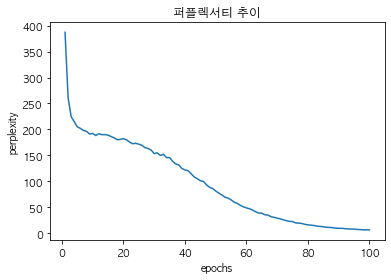

In [5]:
import matplotlib.pyplot as plt
from matplotlib import rc
rc('font', family='AppleGothic')

x = np.arange(1, 101)
plt.plot(x, ppl_list, label='perplexity')
plt.title('퍼플렉서티 추이')
plt.xlabel('epochs'); plt.ylabel('perplexity')
plt.show()

학습을 진행할수록 퍼플렉서티가 순조롭게 낮아짐

### 5.5.4 RNNLM의 Trainer 클래스

RnnlmTrainer 클래스  
    1. 미니배치를 '순차적'으로 만들어  
    2. 모델의 순전파와 역전파를 호출하고  
    3. 옵티마이저로 가중치를 갱신하고  
    4. 퍼플렉서티를 구함  

In [6]:
class RnnlmTrainer:
    def __init__(self, model, optimizer):
        self.model = model
        self.optimizer = optimizer
        self.time_idx = None
        self.ppl_list = None
        self.eval_interval = None
        self.current_epoch = 0

    def get_batch(self, x, t, batch_size, time_size):
        batch_x = np.empty((batch_size, time_size), dtype='i')
        batch_t = np.empty((batch_size, time_size), dtype='i')

        data_size = len(x)
        jump = data_size // batch_size
        offsets = [i * jump for i in range(batch_size)]  # 배치에서 각 샘플을 읽기 시작하는 위치

        for time in range(time_size):
            for i, offset in enumerate(offsets):
                batch_x[i, time] = x[(offset + self.time_idx) % data_size]
                batch_t[i, time] = t[(offset + self.time_idx) % data_size]
            self.time_idx += 1
        return batch_x, batch_t

    def fit(self, xs, ts, max_epoch=10, batch_size=20, time_size=35,
            max_grad=None, eval_interval=20):
        data_size = len(xs)
        max_iters = data_size // (batch_size * time_size)
        self.time_idx = 0
        self.ppl_list = []
        self.eval_interval = eval_interval
        model, optimizer = self.model, self.optimizer
        total_loss = 0
        loss_count = 0

        start_time = time.time()
        for epoch in range(max_epoch):
            for iters in range(max_iters):
                batch_x, batch_t = self.get_batch(xs, ts, batch_size, time_size)

                # 기울기를 구해 매개변수 갱신
                loss = model.forward(batch_x, batch_t)
                model.backward()
                params, grads = remove_duplicate(model.params, model.grads)  # 공유된 가중치를 하나로 모음
                if max_grad is not None:
                    clip_grads(grads, max_grad)
                optimizer.update(params, grads)
                total_loss += loss
                loss_count += 1

                # 퍼플렉서티 평가
                if (eval_interval is not None) and (iters % eval_interval) == 0:
                    ppl = np.exp(total_loss / loss_count)
                    elapsed_time = time.time() - start_time
                    print('| 에폭 %d |  반복 %d / %d | 시간 %d[s] | 퍼플렉서티 %.2f'
                          % (self.current_epoch + 1, iters + 1, max_iters, elapsed_time, ppl))
                    self.ppl_list.append(float(ppl))
                    total_loss, loss_count = 0, 0

            self.current_epoch += 1

    def plot(self, ylim=None):
        x = numpy.arange(len(self.ppl_list))
        if ylim is not None:
            plt.ylim(*ylim)
        plt.plot(x, self.ppl_list, label='train')
        plt.xlabel('반복 (x' + str(self.eval_interval) + ')')
        plt.ylabel('퍼플렉서티')
        plt.show()

RnnlmTrainer 클래스 사용 예시
~~~python
...
from common.trainer import RnnlmTrainer

...
model = SimpleRnnlm(vocab_size, wordvec_size, hidden_size)
optimizer = SGD(lr)
trainer = RnnlmTrainer(model, optimizer)

trainer.fit(xs, ts, max_epoch, batch_size, time_size)
~~~